In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
dataset= pd.read_csv(r"C:\Users\ASUS\Downloads\Skills\Data Science\salary.csv")
dataset.head()

,Lev,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [9]:
dataset.corr()

,Lev,Salary
Lev,1.000000,0.961171
Salary,0.961171,1.000000


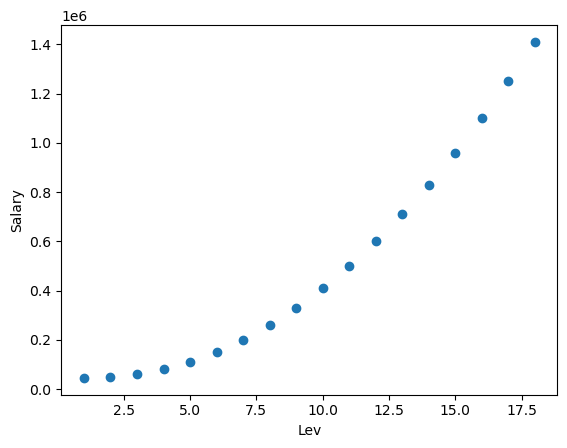

In [11]:
plt.scatter(dataset["Lev"],dataset["Salary"])
plt.xlabel("Lev")
plt.ylabel("Salary")
plt.show()

In [16]:
x = dataset[["Lev"]]
y= dataset["Salary"]

In [17]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [19]:
pf.fit(x)
x = pf.transform(x)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.score(x_test,y_test)

0.9995306816848527

In [26]:
prd=lr.predict(x)

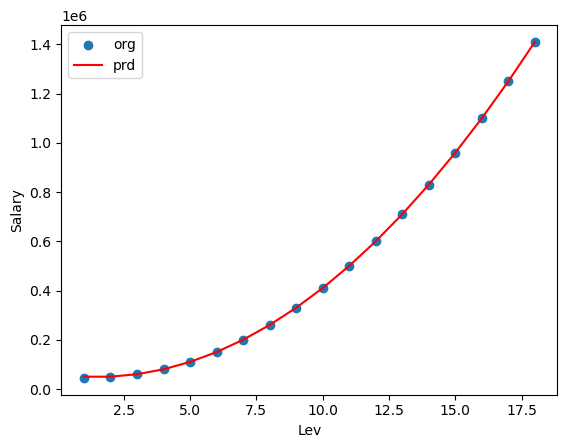

In [32]:
plt.scatter(dataset["Lev"],dataset["Salary"])
plt.plot(dataset["Lev"],prd,c="red")
plt.xlabel("Lev")
plt.ylabel("Salary")
plt.legend(["org","prd"])
plt.show()

In [36]:
#Lets see the equation and compare
# y = m1*x1 + m2*x2^2 + c
lr.coef_  , lr.intercept_

(array([     0., -15000.,   5000.]), 60000.00000000023)

In [37]:
#NOw equation is y = -15000*x1 +  5000*x2^2 + 60000


In [41]:
#Lets see how we test new data
test = pf.transform([[13]]) #lets see if we get 13 as a new input
test

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,  13., 169.]])

In [43]:
lr.predict(test)
#now we get 71000 as output which is exact same as the result we have in our original data
#it means this test is working fine and predict the correct answer

array([710000.])